In [1]:
from brian2 import *


prefs.codegen.target = "numpy"

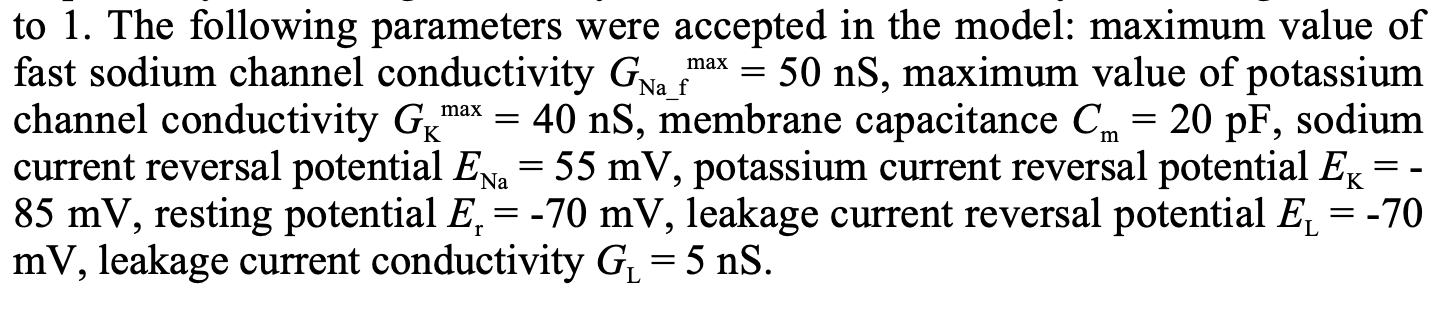

In [4]:
gl

10. * nsiemens

In [5]:
Cm

200. * pfarad

In [7]:
g_na

20. * usiemens

In [8]:
g_kd

6. * usiemens

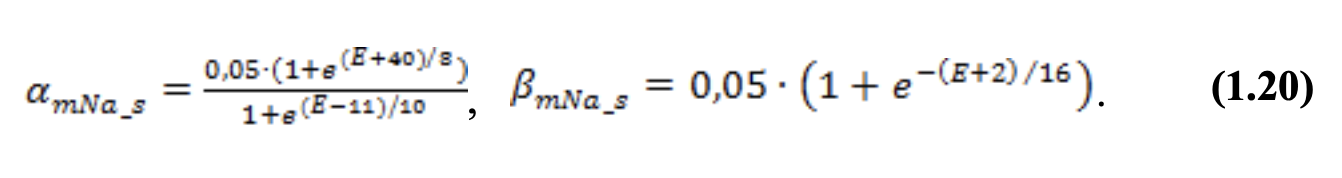

In [41]:
# Brian's equation with Krylov parameters
# Parameters
area = 20000*umetre**2
Cm = 20 * pfarad  # was 200 pF
gl = 5 * nsiemens
El = -70*mV
EK = -85*mV
ENa = 55*mV
g_nas = 75 * nsiemens  # 200
g_na = 50 * nsiemens  # was 20uS
g_kd = 40 * nsiemens  # was 6uS
VT = -63*mV

# The model
eqs = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) - g_nas*INas + I)/Cm : volt
INas = (v-ENa) * m_s**3*h : volt
dm/dt = 0.32*(mV**-1)*4*mV/exprel((13.*mV-v+VT)/(4*mV))/ms*(1-m)-0.28*(mV**-1)*5*mV/exprel((v-VT-40.*mV)/(5*mV))/ms*m : 1
dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
dm_s/dt = ams * (1 - m_s) - bms * m_s : 1
ams = 0.05 * (1 + exp(v/mV + 40)/8)/(1 + exp(v/mV - 11)/10)/ms : Hz
bms = 0.05 * (1 + exp(-(v/mV + 2))/16)/ms : Hz

I : amp
''')
# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(1, eqs,
                    threshold='v > -40*mV',
                    refractory='v > -40*mV',
                    method='exponential_euler')
group.v = El
stmon = StateMonitor(group, 'v', True)

run(10*ms)
group.I = 110*pA
run(200*ms)
group.I = 0 * pA
run(50*ms)

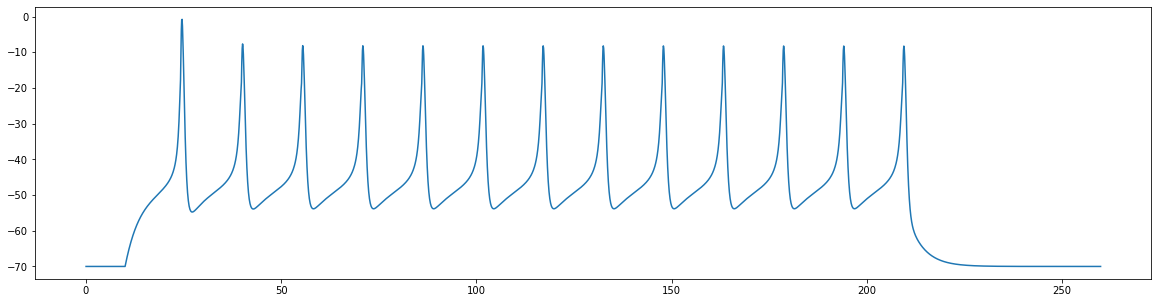

In [42]:
# Na_s krylov (gnas = 200)
figure(figsize=(20, 5))
plot(stmon.t/ms, stmon.v[0]/mV)

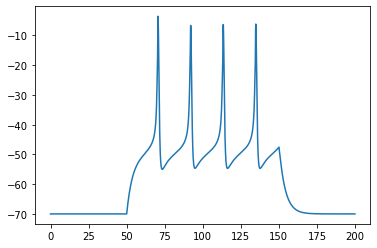

In [16]:
# Na_s krylov (gnas = 75)
plot(stmon.t/ms, stmon.v[0]/mV)

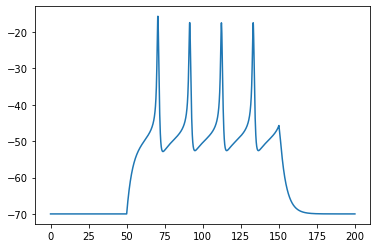

In [12]:
# krylov version
plot(stmon.t/ms, stmon.v[0]/mV)

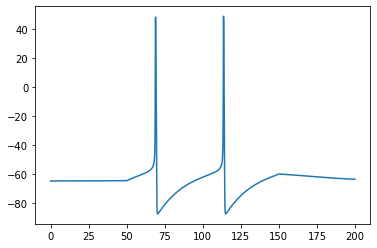

In [3]:
# brian doc version
plot(stmon.t/ms, stmon.v[0]/mV)